# Цель лабораторной работы
Изучение способов предварительной обработки данных для дальнейшего формирования моделей.

# Задание
Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)

Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
* обработку пропусков в данных;
* кодирование категориальных признаков;
* масштабирование данных.

# Ход работы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Загружаем датасет
data = pd.read_csv('data/gun-violence-data_01-2013_03-2018.csv')

In [3]:
# размер набора данных
data.shape

(239677, 29)

In [4]:
# типы колонок
data.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

In [6]:
# Первые 5 строк датасета
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 239677


# 1. Обработка пропусков в данных

## 1.1. Простые стратегии - удаление или заполнение нулями

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((239677, 29), (239677, 8))

In [9]:
data_new_1.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,incident_url,incident_url_fields_missing
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,http://www.gunviolencearchive.org/incident/461105,False
1,460726,2013-01-01,California,Hawthorne,1,3,http://www.gunviolencearchive.org/incident/460726,False
2,478855,2013-01-01,Ohio,Lorain,1,3,http://www.gunviolencearchive.org/incident/478855,False
3,478925,2013-01-05,Colorado,Aurora,4,0,http://www.gunviolencearchive.org/incident/478925,False
4,478959,2013-01-07,North Carolina,Greensboro,2,2,http://www.gunviolencearchive.org/incident/478959,False


In [10]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((239677, 29), (1059, 29))

In [11]:
data_new_2.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
36,482856,2013-03-13,New York,Mohawk,17 W Main St,6,2,http://www.gunviolencearchive.org/incident/482856,http://www.syracuse.com/news/index.ssf/2013/03...,False,...,0::68||1::57||2::66||3::67||4::62||5::51||6::2...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||4::Male||5::Male||6...,0::Harry Montgomery||1::Michael Ransear||2::Jo...,7::Aquaintance,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/upstate-new-york-s...,101.0,51.0
83,486623,2013-05-23,Tennessee,Bean Station,1034 Main Street,2,2,http://www.gunviolencearchive.org/incident/486623,http://legacy.wbir.com/story/news/local/hamble...,False,...,1::72||2::45||4::37,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||3::Female||4::Male,0::Stephen Lovell||1::Richard Alexander Sommer...,4::Armed Robbery,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.dailymail.co.uk/news/article-233016...,35.0,8.0
101,487833,2013-06-15,Tennessee,Nashville,135 Brinkhaven Ave,0,4,http://www.gunviolencearchive.org/incident/487833,http://www.timesfreepress.com/news/local/story...,False,...,0::34||1::14||2::14||3::15||4::39,0::Adult 18+||1::Teen 12-17||2::Teen 12-17||3:...,0::Female||1::Female||2::Female||3::Female||4:...,0::Nicole Luke||1::Keona Luke||2::Deona Luke||...,4::Significant others - current or former,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.usatoday.com/story/news/nation/2013...,51.0,19.0
181,492276,2013-08-25,Florida,Lake Butler,1050 Southeast 6th Street,4,1,http://www.gunviolencearchive.org/incident/492276,http://www.usatoday.com/story/news/nation/2013...,False,...,0::28||1::80||2::66||3::44||4::72,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Rolando Gonzalez-Delgado||1::Marvin Pritche...,4::Co-worker,0::Killed||1::Killed||2::Injured||3::Killed||4...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/motive-a-mystery-i...,19.0,5.0
200,480521,2013-09-19,Illinois,Chicago,1809 W 50th St,0,12,http://www.gunviolencearchive.org/incident/480521,http://www.nydailynews.com/news/national/chica...,False,...,0::3||1::17||2::15||3::27||4::24||5::21||6::41...,0::Child 0-11||1::Teen 12-17||2::Teen 12-17||3...,0::Male||1::Female||2::Male||3::Male||4::Male|...,0::Deonta Howard||13::Quinton M. Humphries||14...,13::Gang vs Gang||14::Gang vs Gang||15::Gang v...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.chicagotribune.com/news/local/break...,2.0,1.0


In [12]:
# Заполнение всех пропущенных значений нулями
data_new_3 = data.fillna(0)
data_new_3.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,0,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,0.0,0.0
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,0,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,0,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,0,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


# 1.2. "Внедрение значений" - импьютация (imputation)

## 1.2.1. Обработка пропусков в числовых данных

In [13]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка congressional_district. Тип данных float64. Количество пустых значений 11944, 4.98%.
Колонка latitude. Тип данных float64. Количество пустых значений 7923, 3.31%.
Колонка longitude. Тип данных float64. Количество пустых значений 7923, 3.31%.
Колонка n_guns_involved. Тип данных float64. Количество пустых значений 99451, 41.49%.
Колонка state_house_district. Тип данных float64. Количество пустых значений 38772, 16.18%.
Колонка state_senate_district. Тип данных float64. Количество пустых значений 32335, 13.49%.


In [14]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
0,14.0,40.3467,-79.8559,NaN,NaN,NaN
1,43.0,33.9090,-118.3330,NaN,62.0,35.0
2,9.0,41.4455,-82.1377,2.0,56.0,13.0
3,6.0,39.6518,-104.8020,NaN,40.0,28.0
4,6.0,36.1140,-79.9569,2.0,62.0,27.0
5,1.0,36.2405,-95.9768,NaN,72.0,11.0
6,1.0,34.9791,-106.7160,2.0,10.0,14.0
7,2.0,29.9435,-90.0836,NaN,93.0,5.0
8,9.0,37.9656,-121.7180,NaN,11.0,7.0
9,7.0,39.2899,-76.6412,NaN,NaN,44.0


/home/anybyte/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/anybyte/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


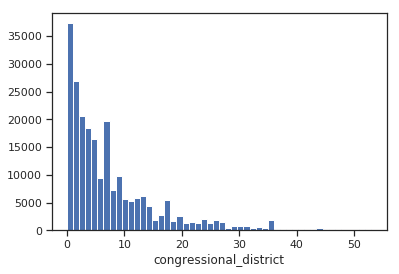

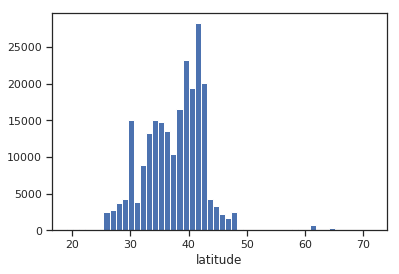

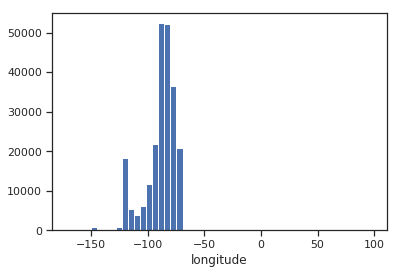

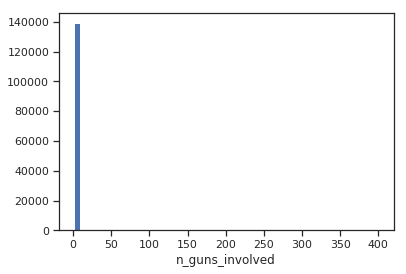

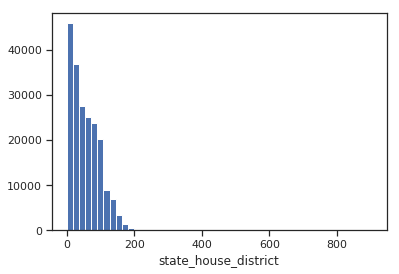

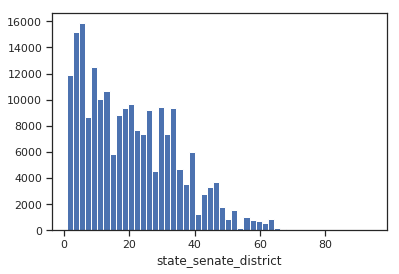

In [15]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [16]:
# Фильтр по пустым значениям поля rank
data[data['n_guns_involved'].isnull()]

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.huffingtonpost.com/2013/01/21/new-o...,93.0,5.0
8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,http://sanfrancisco.cbslocal.com/2013/01/22/4-...,False,...,NaN,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.contracostatimes.com/ci_22426767/br...,11.0,7.0
9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,http://www.gunviolencearchive.org/incident/492151,http://www.abc2news.com/news/crime-checker/bal...,False,...,0::15,0::Teen 12-17||1::Adult 18+||2::Adult 18+||3::...,0::Male,0::Deshaun Jones,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://articles.baltimoresun.com/2013-08-25/ne...,NaN,44.0
14,479460,2013-01-26,Ohio,Springfield,601 West Main Street,1,3,http://www.gunviolencearchive.org/incident/479460,http://www.whio.com//news/news/crime-law/arres...,False,...,0::34||1::28||2::23||3::29||4::29,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Ernest Edwards||1::Anthony Clark||2::Joshua...,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.daytondaily

In [17]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['n_guns_involved'].isnull()].index
flt_index

Int64Index([     0,      1,      3,      5,      7,      8,      9,     14,
                17,     19,
            ...
            225507, 228291, 230913, 231391, 235147, 237054, 237457, 238524,
            238940, 239403],
           dtype='int64', length=99451)

In [18]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.huffingtonpost.com/2013/01/21/new-o...,93.0,5.0
8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,http://sanfrancisco.cbslocal.com/2013/01/22/4-...,False,...,NaN,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.contracostatimes.com/ci_22426767/br...,11.0,7.0
9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,http://www.gunviolencearchive.org/incident/492151,http://www.abc2news.com/news/crime-checker/bal...,False,...,0::15,0::Teen 12-17||1::Adult 18+||2::Adult 18+||3::...,0::Male,0::Deshaun Jones,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://articles.baltimoresun.com/2013-08-25/ne...,NaN,44.0
14,479460,2013-01-26,Ohio,Springfield,601 West Main Street,1,3,http://www.gunviolencearchive.org/incident/479460,http://www.whio.com//news/news/crime-law/arres...,False,...,0::34||1::28||2::23||3::29||4::29,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Ernest Edwards||1::Anthony Clark||2::Joshua...,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.daytondaily

In [19]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['n_guns_involved']

0        NaN
1        NaN
3        NaN
5        NaN
7        NaN
8        NaN
9        NaN
14       NaN
17       NaN
19       NaN
21       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
29       NaN
31       NaN
35       NaN
37       NaN
38       NaN
39       NaN
40       NaN
41       NaN
43       NaN
44       NaN
45       NaN
46       NaN
47       NaN
48       NaN
          ..
215860   NaN
215929   NaN
216955   NaN
216980   NaN
219154   NaN
220365   NaN
220977   NaN
221491   NaN
222030   NaN
222143   NaN
222398   NaN
222471   NaN
223355   NaN
223521   NaN
223530   NaN
223577   NaN
223579   NaN
223748   NaN
224305   NaN
224797   NaN
225507   NaN
228291   NaN
230913   NaN
231391   NaN
235147   NaN
237054   NaN
237457   NaN
238524   NaN
238940   NaN
239403   NaN
Name: n_guns_involved, Length: 99451, dtype: float64

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html#impute

In [20]:
data_num_n_guns_involved = data_num[['n_guns_involved']]
data_num_n_guns_involved.head()

,n_guns_involved
0,NaN
1,NaN
2,2.0
3,NaN
4,2.0


In [21]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [22]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_n_guns_involved)
mask_missing_values_only

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

С помощью класса SimpleImputer можно проводить импьютацию различными показателями центра распределения

In [23]:
strategies=['mean', 'median','most_frequent']

In [24]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_n_guns_involved)
    return data_num_imp[mask_missing_values_only]

In [25]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([1.37244163, 1.37244163, 1.37244163, ..., 1.37244163, 1.37244163,
        1.37244163]))

In [26]:
strategies[1], test_num_impute(strategies[1])

('median', array([1., 1., 1., ..., 1., 1., 1.]))

In [27]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([1., 1., 1., ..., 1., 1., 1.]))

In [28]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [29]:
test_num_impute_col(data, 'n_guns_involved', strategies[0])

('n_guns_involved', 'mean', 99451, 1.3724416299402393, 1.3724416299402393)

In [30]:
test_num_impute_col(data, 'n_guns_involved', strategies[1])

('n_guns_involved', 'median', 99451, 1.0, 1.0)

In [31]:
test_num_impute_col(data, 'n_guns_involved', strategies[2])

('n_guns_involved', 'most_frequent', 99451, 1.0, 1.0)

## 1.2.2. Обработка пропусков в категориальных данных

In [32]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка address. Тип данных object. Количество пустых значений 16497, 6.88%.
Колонка source_url. Тип данных object. Количество пустых значений 468, 0.2%.
Колонка gun_stolen. Тип данных object. Количество пустых значений 99498, 41.51%.
Колонка gun_type. Тип данных object. Количество пустых значений 99451, 41.49%.
Колонка incident_characteristics. Тип данных object. Количество пустых значений 326, 0.14%.
Колонка location_description. Тип данных object. Количество пустых значений 197588, 82.44%.
Колонка notes. Тип данных object. Количество пустых значений 81017, 33.8%.
Колонка participant_age. Тип данных object. Количество пустых значений 92298, 38.51%.
Колонка participant_age_group. Тип данных object. Количество пустых значений 42119, 17.57%.
Колонка participant_gender. Тип данных object. Количество пустых значений 36362, 15.17%.
Колонка participant_name. Тип данных object. Количество пустых значений 122253, 51.01%.
Колонка participant_relationship. Тип данных object. Количество пустых з

Класс SimpleImputer можно использовать для категориальных признаков со стратегиями "most_frequent" или "constant".

In [33]:
cat_temp_data = data[['gun_stolen']]
cat_temp_data.head()

,gun_stolen
0,NaN
1,NaN
2,0::Unknown||1::Unknown
3,NaN
4,0::Unknown||1::Unknown


In [34]:
cat_temp_data['gun_stolen'].unique()

array([nan, '0::Unknown||1::Unknown', '0::Unknown',
       '0::Unknown||1::Unknown||2::Unknown||3::Unknown',
       '0::Not-stolen||1::Unknown', '0::Unknown||1::Unknown||2::Unknown',
       '0::Stolen||1::Stolen', '0::Not-stolen', '0::Stolen',
       '0::Stolen||1::Stolen||2::Unknown||3::Unknown',
       '0::Stolen||1::Unknown||2::Unknown',
       '0::Unknown||1::Unknown||2::Unknown||3::Unknown||4::Unknown||5::Unknown',
       '0::Unknown||1::Unknown||2::Unknown||3::Unknown||4::Unknown||5::Unknown||6::Unknown||7::Unknown||8::Unknown||9::Unknown||10::Unknown||11::Unknown||12::Unknown||13::Unknown||14::Unknown||15::Unknown||16::Unknown||17::Unknown||18::Unknown||19::Unknown||20::Unknown||21::Unknown||22::Unknown||23::Unknown||24::Unknown',
       '0:Unknown', '0:Stolen|1:Stolen', '0:Unknown|1:Unknown',
       '0:Not-stolen',
       '0:Unknown|1:Unknown|2:Unknown|3:Unknown|4:Unknown|5:Unknown|6:Unknown|7:Unknown|8:Unknown|9:Unknown|10:Unknown|11:Unknown|12:Unknown|13:Unknown|14:Unknown|15

In [35]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['0::Unknown'],
       ['0::Unknown'],
       ['0::Unknown||1::Unknown'],
       ...,
       ['0::Unknown'],
       ['0::Unknown'],
       ['0::Unknown||1::Unknown']], dtype=object)

In [36]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['0::Not-stolen', '0::Not-stolen||1::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen||5::Not-stolen||6::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen||5::Not-stolen||6::Not-stolen||7::Not-stolen||8::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen||5::Not-stolen||6::Not-stolen||7::Not-stolen||8::Not-stolen||9::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen||5::Not-stolen||6::Not-stolen||7::Not-stolen||8::Not-stolen||9::Not-stolen||10::Not-stolen||11::Not-stolen||12::Not-stolen||13::Not-stolen||14::Not-stolen||15::Not-stolen||16::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stol

In [37]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Unknown'],
       ['Unknown'],
       ['0::Unknown||1::Unknown'],
       ...,
       ['0::Unknown'],
       ['0::Unknown'],
       ['0::Unknown||1::Unknown']], dtype=object)

In [38]:
np.unique(data_imp3)

array(['0::Not-stolen', '0::Not-stolen||1::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen||5::Not-stolen||6::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen||5::Not-stolen||6::Not-stolen||7::Not-stolen||8::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen||5::Not-stolen||6::Not-stolen||7::Not-stolen||8::Not-stolen||9::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen||5::Not-stolen||6::Not-stolen||7::Not-stolen||8::Not-stolen||9::Not-stolen||10::Not-stolen||11::Not-stolen||12::Not-stolen||13::Not-stolen||14::Not-stolen||15::Not-stolen||16::Not-stolen',
       '0::Not-stolen||1::Not-stolen||2::Not-stol

In [39]:
data_imp3[data_imp3=='Unknown'].size

99498

# 2. Преобразование категориальных признаков в числовые

In [40]:
# Загружаем датасет
data = pd.read_csv('data/googleplaystore.csv')

In [41]:
# размер набора данных
data.shape

(10841, 13)

In [42]:
# типы колонок
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [43]:
# Первые 5 строк датасета
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [44]:
category = data[['Category']]

In [45]:
categories = category['Category'].unique()

## 2.1. Кодирование категорий целочисленными значениями - label encoding

In [46]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [47]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(categories)

In [48]:
idxs = np.unique(cat_enc_le)

In [49]:
idxs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [50]:
le.inverse_transform(idxs)

array(['1.9', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
       'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'], dtype=object)

## 2.2. Кодирование категорий наборами бинарных значений - one-hot encoding

In [51]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(category)

In [52]:
category.shape

(10841, 1)

In [53]:
cat_enc_ohe.shape

(10841, 34)

In [54]:
cat_enc_ohe

<10841x34 sparse matrix of type '<class 'numpy.float64'>'
	with 10841 stored elements in Compressed Sparse Row format>

In [55]:
cat_enc_ohe.todense()[0:5]

matrix([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])

In [56]:
category.head()

,Category
0,ART_AND_DESIGN
1,ART_AND_DESIGN
2,ART_AND_DESIGN
3,ART_AND_DESIGN
4,ART_AND_DESIGN


## Pandas get_dummies - быстрый вариант one-hot кодирования

In [57]:
pd.get_dummies(category).head()

,Category_1.9,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Масштабирование данных

In [58]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [59]:
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

## 3.1. MinMax масштабирование

In [60]:
data['Price_val'] = data['Price'].replace('[\$]', '', regex=True).replace('Everyone', '0').astype(np.float64)

In [61]:
data = data[data['Price_val'] > 0]

In [62]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Price_val']])

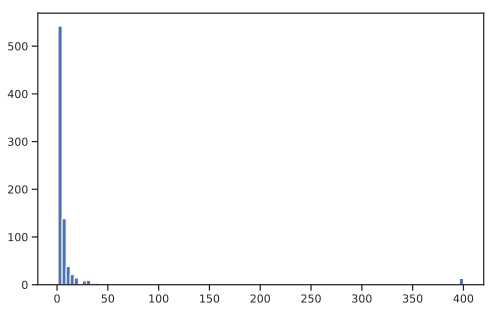

In [63]:
plt.hist(data['Price_val'], 100)
plt.show()

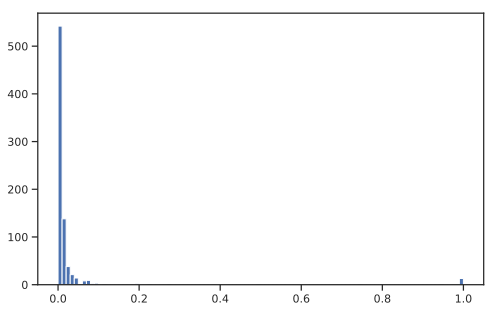

In [64]:
plt.hist(sc1_data, 100)
plt.show()

## 3.2. Масштабирование данных на основе Z-оценки - StandardScaler

In [65]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Price_val']])

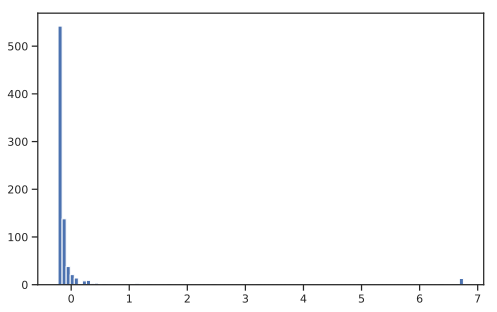

In [66]:
plt.hist(sc2_data, 100)
plt.show()

## 3.3. Нормализация данных

In [67]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Price_val']])

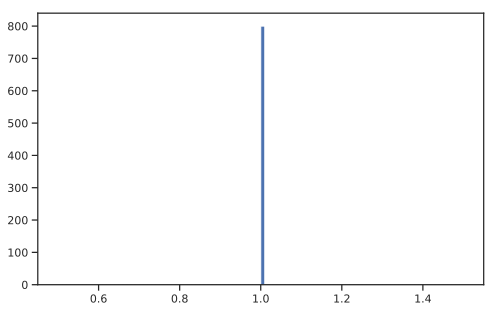

In [68]:
plt.hist(sc3_data, 100)
plt.show()